<a href="https://colab.research.google.com/github/SDineshKumar1304/Dinesh-kumar-S-Work/blob/main/Sarcassm_Detection_Using_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install spacy

In [2]:
!python -m spacy download en_core_web_sm

2023-10-03 12:39:13.781624: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-03 12:39:14.792313: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 79.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
!python -m spacy info

2023-10-03 12:39:28.814692: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-03 12:39:29.707059: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

============================== Info about spaCy ==============================

spaCy version    3.6.1                         
Location         /usr/local/lib/python3.10/dist-packages/spacy
Platform         Linux-5.15.120+-x86_64-with-glibc2.35
Python version   3.10.12                       
Pipelines        en_core_web_sm (3.6.0)        



# **Importing necessary Libraries**

In [5]:
import pandas as pd
import numpy as np
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# **Read the Sarcassm Dataset and print first five elmentsn of the dataset :**

In [6]:
data = pd.read_csv('/content/Sarcasm.csv')
print(data.head())


   Unnamed: 0                                              tweet  sarcastic  \
0           0  The only thing I got from college is a caffein...          1   
1           1  I love it when professors draw a big question ...          1   
2           2  Remember the hundred emails from companies whe...          1   
3           3  Today my pop-pop told me I was not “forced” to...          1   
4           4  @VolphanCarol @littlewhitty @mysticalmanatee I...          1   

   sarcasm  irony  satire  understatement  overstatement  rhetorical_question  
0      0.0    1.0     0.0             0.0            0.0                  0.0  
1      1.0    0.0     0.0             0.0            0.0                  0.0  
2      0.0    1.0     0.0             0.0            0.0                  0.0  
3      1.0    0.0     0.0             0.0            0.0                  0.0  
4      1.0    0.0     0.0             0.0            0.0                  0.0  


# **Similarly Tail part of the Dataset :**

In [8]:
data.tail()

,Unnamed: 0,tweet,sarcastic,sarcasm,irony,satire,understatement,overstatement,rhetorical_question
3463,3463,The population spike in Chicago in 9 months is...,0,NaN,NaN,NaN,NaN,NaN,NaN
3464,3464,You'd think in the second to last English clas...,0,NaN,NaN,NaN,NaN,NaN,NaN
3465,3465,I’m finally surfacing after a holiday to Scotl...,0,NaN,NaN,NaN,NaN,NaN,NaN
3466,3466,Couldn't be prouder today. Well done to every ...,0,NaN,NaN,NaN,NaN,NaN,NaN
3467,3467,Overheard as my 13 year old games with a frien...,0,NaN,NaN,NaN,NaN,NaN,NaN


# **Checking the shape of the dataframe :**

In [9]:
data.shape

(3468, 9)

# **Data Information**

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3468 entries, 0 to 3467
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           3468 non-null   int64  
 1   tweet                3467 non-null   object 
 2   sarcastic            3468 non-null   int64  
 3   sarcasm              867 non-null    float64
 4   irony                867 non-null    float64
 5   satire               867 non-null    float64
 6   understatement       867 non-null    float64
 7   overstatement        867 non-null    float64
 8   rhetorical_question  867 non-null    float64
dtypes: float64(6), int64(2), object(1)
memory usage: 244.0+ KB


# **Checking the total null Values**

In [11]:
data.isna().sum()

Unnamed: 0                0
tweet                     1
sarcastic                 0
sarcasm                2601
irony                  2601
satire                 2601
understatement         2601
overstatement          2601
rhetorical_question    2601
dtype: int64

# **Removing the Null values**

In [12]:
data.dropna()

,Unnamed: 0,tweet,sarcastic,sarcasm,irony,satire,understatement,overstatement,rhetorical_question
0,0,The only thing I got from college is a caffein...,1,0.0,1.0,0.0,0.0,0.0,0.0
1,1,I love it when professors draw a big question ...,1,1.0,0.0,0.0,0.0,0.0,0.0
2,2,Remember the hundred emails from companies whe...,1,0.0,1.0,0.0,0.0,0.0,0.0
3,3,Today my pop-pop told me I was not “forced” to...,1,1.0,0.0,0.0,0.0,0.0,0.0
4,4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
862,862,yo @claires do yall do hysterectomies?,1,1.0,0.0,0.0,0.0,0.0,1.0
863,863,@JacobWohlReport Do I need to aquire a wife be...,1,1.0,0.0,0.0,0.0,0.0,1.0
864,864,I get a lot of boy who cried wolf vibes from t...,1,0.0,1.0,0.0,0.0,0.0,0.0
865,865,Update: holding hands with your mom and walkin...,1,1.0,0.0,0.0,0.0,0.0,0.0


# **Describing the Dataset**

In [13]:
data.describe()

,Unnamed: 0,sarcastic,sarcasm,irony,satire,understatement,overstatement,rhetorical_question
count,3468.000000,3468.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000
mean,1733.500000,0.250000,0.822376,0.178777,0.028835,0.011534,0.046136,0.116494
std,1001.269694,0.433075,0.382417,0.383387,0.167439,0.106837,0.209901,0.321001
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,866.750000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1733.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2600.250000,0.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3467.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **Natural Language Processing is Initialized for Lemmatization,tokenization from Spacy Library :**

In [16]:
nlp = spacy.load("en_core_web_sm")

# **Text Prepocessing**

In [18]:
def preprocess_text(text):
    if isinstance(text, str):
        doc = nlp(text)
        tokens = [token.text.lower() for token in doc if not token.is_punct and not token.is_stop]
        return ' '.join(tokens)
    else:
        return ''
data['cleaned_tweet'] = data['tweet'].apply(preprocess_text)


# **Spitting Data into training nad Testing sets**

In [20]:
X = data['cleaned_tweet']
y = data['sarcastic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# **TF-IDF Vectorization:**

In [32]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [21]:
X_train.head()

104     lucky 2nd placed brentford stand team like lee...
2584    7 months unemployment start new job tuesday fr...
3267    massively expensive exercise pushing boundarie...
2425    thought months wine expensive wine birthday af...
2952       god hope etsy sellers names lists add products
Name: cleaned_tweet, dtype: object

In [22]:
X_train.shape

(2427,)

In [23]:
y_train.head()

104     1
2584    0
3267    0
2425    0
2952    0
Name: sarcastic, dtype: int64

In [24]:
y_train.shape

(2427,)

# **Model Trainning Support Vector machine**

In [25]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

# **Predictions**

In [26]:
y_pred = svm_classifier.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.7204610951008645
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.97      0.83       755
           1       0.44      0.06      0.10       286

    accuracy                           0.72      1041
   macro avg       0.58      0.52      0.47      1041
weighted avg       0.65      0.72      0.63      1041



# **Visualizations :**
# **Confusion Matrix**

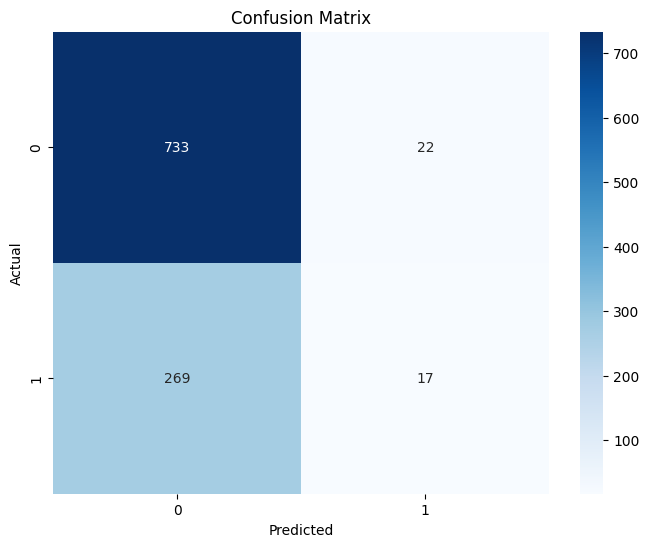

In [27]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# **ROC Curve**

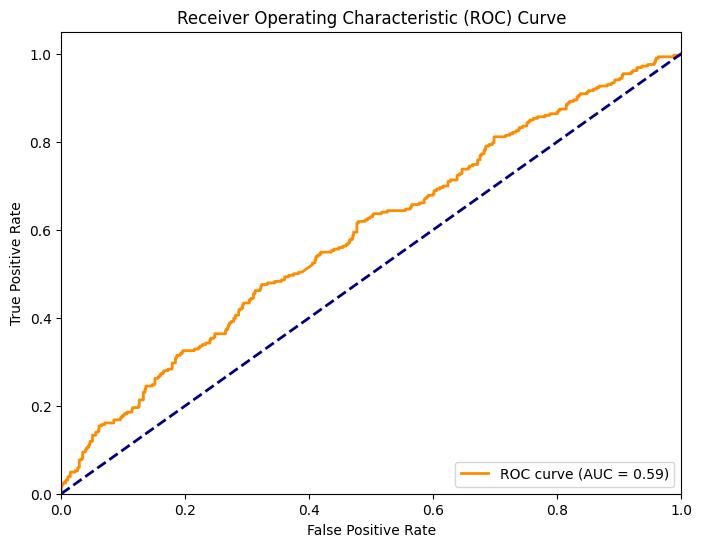

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = svm_classifier.decision_function(X_test_tfidf)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# **Precise Call Curve**

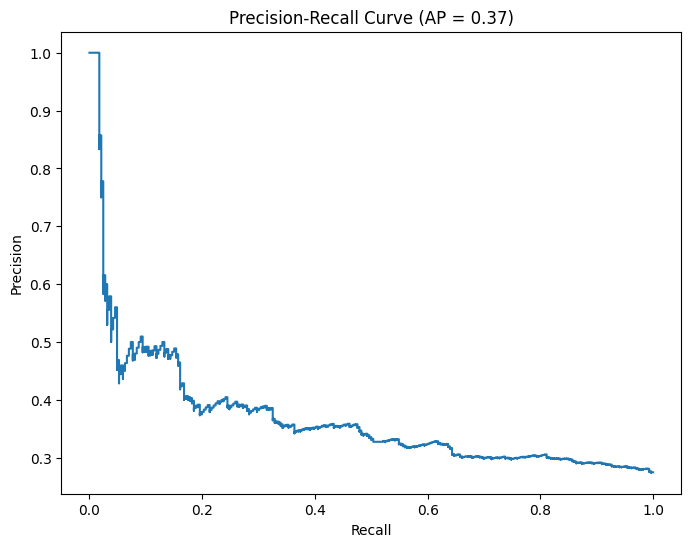

In [29]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (AP = {average_precision:.2f})')
plt.show()


# **Bar Plot Visuals of Accuracy and F1 Score :**

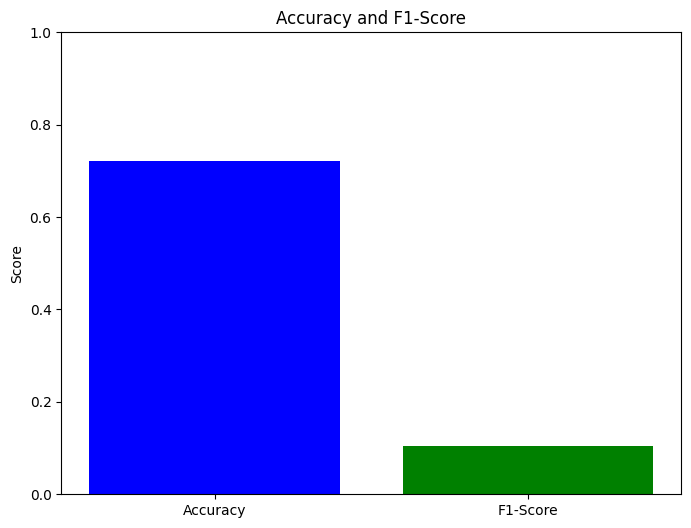

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.bar(['Accuracy', 'F1-Score'], [accuracy, f1], color=['blue', 'green'])
plt.ylim(0, 1)
plt.title('Accuracy and F1-Score')
plt.ylabel('Score')
plt.show()
